### **Curso 275 - INTRODUÇÃO A CIENCIA DE DADOS**
### SCC - ICMC - USP
### 2o. SEMESTRE DE 2021

**Profa. Dra. Roseli Ap. Francelin Romero**
**Monitor: Kenzo Sakiyama**

Name: Éverton Luís Mendes da SIlva(10728171)

## **Questão 01**.

Considere o dataset `Adult Data Set` disponível no arquivo `adult.csv`. A ideia desse dataset é classificar se um determinado indivíduo recebe mais ou menos de 50.000 dólares/ano (atributo `Income`). **Dados faltantes são representados pelo caractere `?`**. Fazendo uma breve exploração dos dados e responda as seguintes questões comprovando por meio de código correspondente: <br>
a) quantos atributos numéricos existem? (0.5) <br> 
b) quantos atributos categóricos existem? (0.5) <br>
c) Se existem dados faltantes, quais são eles e quantos são? (1.0) <br>



In [21]:
import pandas as pd
import seaborn as sn
import numpy as np

In [2]:
adult_df=pd.read_csv("adult.csv")

item a)

In [10]:
numeric_features= adult_df._get_numeric_data().columns.tolist()
print(numeric_features)

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


item b)

In [11]:
categorical_features = [attribute for attribute in adult_df.columns.tolist() if attribute not in adult_df._get_numeric_data().columns.tolist()]
print(categorical_features)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


item c)

The missing data from this csv can be found by seaborn

<AxesSubplot:>

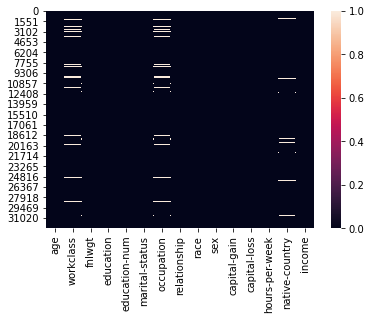

In [23]:
sn.heatmap(adult_df.replace("?", np.nan).isna())

In [63]:
adult_df.replace("?", np.nan, inplace=True)

In [74]:
missing_count=0
for attribute in adult_df.columns:
    
    missing_True=len(adult_df[attribute].isna().value_counts())
    
    if missing_True==2:
        missing_count+=adult_df[attribute].isna().value_counts()[1]

In [75]:
print("this DataFrame have {} missing values".format(missing_count))

this DataFrame have 4262 missing values


### **Questão 02**.

Considere o dataset `Iris` presente no aquivo 'iris.csv'. Determine qual o par de atributos que possui menor correlação de Pearson (em valor absoluto) e qual o valor da correlação. Comprove a resposta por meio de código correspondente. (1.0)

 

In [33]:
iris_df=pd.read_csv("iris.csv")

In [35]:
iris_df.drop(columns="class", inplace=True)

<AxesSubplot:>

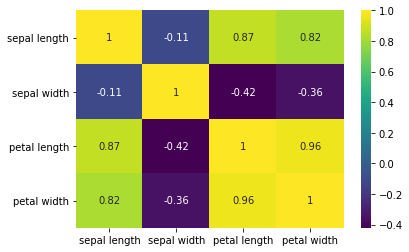

In [36]:
sn.heatmap(iris_df.corr(method='pearson'), annot=True, cmap='viridis')

In [84]:
def max_min_corr(df):
    '''the function calculates the max and min value of a correlation matrix, obtained from a DataFrame
    Args:
        df, DataFrame
    Return:
        first_max,
        second_max.
        first_min, 
        second_min, 
    '''

    corr_iris=df.corr(method='pearson').abs()
    upper = corr_iris.where(np.triu(np.ones(corr_iris.shape), k=1).astype(np.bool))
    
    first_max=upper.max().dropna().idxmax()
    second_max=upper.idxmax()[str(first_max)]

    first_min=upper.min().dropna().idxmin()
    second_min=upper.idxmin()[str(first_min)]

    print('The variables with more correlation are {} and {}'.format(first_max, second_max))
    print('The variables with less correlation are {} and {}'.format(first_min, second_min))

    return first_max, second_max, first_min, second_min

In [85]:
max_min_corr(iris_df)

The variables with more correlation are petal width and petal length
The variables with less correlation are sepal width and sepal length


('petal width', 'petal length', 'sepal width', 'sepal length')

## **Questão 03**.
Considere o conjunto de regressão houses_to_rent modificado, disponível no arquivo houses_modified.csv. A ideia desse dataset é estimar o valor de alguel (rent amount (R$)) de um determinado imóvel. Para essa questão você deve:

Carregue o arquivo em um dataframe. Pede-se: <br>
a) gerar um gráfico do tipo boxplot para o atributo rent amount (R$). (0.5) <br>
b) com base no boxplot, o que se pode dizer sobre o tipo de distribuição dos dados em termos da medida de obliquidade. Justifique sua resposta por meio de código correspondente. (1.5)
 

In [40]:
house_df=pd.read_csv("houses_modified.csv")

item a)

C:\Users\wever\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='rent amount (R$)'>

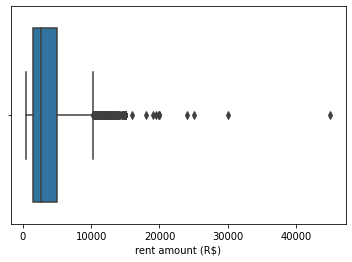

In [41]:
sn.boxplot(house_df["rent amount (R$)"])

Pelo boxplot podemos afirmar que o conjunto de dados possui uma obliquidade positiva, visto que seus dados estão concentrados a esquerda do gráfico(Tendo outliers mais a direita). 

In [44]:
print("A obliquidade desse atributo é {}".format(house_df["rent amount (R$)"].skew()))

A obliquidade desse atributo é 1.8388773035440982


## **Questão 04**.
Suponha que em um problema de classificação binária de um dataset balanceado, um cientista de dados treinou três modelos diferentes e obteve as seguintes acurácias em um determinado conjunto de treino/teste:

Modelo A: Treino = 0.95, Teste = 0.38 <br>
Modelo B: Treino = 0.75, Teste = 0.74 <br>
Modelo C: Treino = 0.35, Teste = 0.75 <br>

Dentre os modelos avaliados, qual seria o melhor? Justifique sua resposta. (2.0)

 

Dentre os modelos avaliados pelo cientista de dados, aquele com melhor confiança seria o modelo B


- O modelo A possui um boa predição em seu conjunto de treino, contudo podemos ver que esse modelo sofreu um overfitting(apenas consegue prever o conjunto treinado, levando a uma má predição em novos conjuntos).

- Já o modelo C possui uma péssima predição no conjunto de treino e, inesperadamente, uma boa predição do conjunto de Testes. Contudo, fica a questão, ele teria essa boa predição em um novo conjunto de Teste? A resposta para essa questão é NÂO, visto que ele é muita aleatório e varia muito com cada conjunto(não é possível ter uma confiaça com esse modelo)

- O modelo B é o melhor porque ele acerta naquilo que ele preve(podemos ter uma confiança na sua acurácia).

## **Questão 5**

Compare dois classificadores na base dados Breast Cancer e indique o mais adequado para a base de dados (3.0). Siga as instruções: 

- Utilize os códigos disponíveis para carregar e processar os dados.
- Utilize os modelos SVM e KNN com os parâmetros padrão do sklearn.
- Escolha uma técnica de validação cruzada para avaliar os modelos (ex:  *train test split* [(holdout)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) , [K-fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) ou [Stratified K-Fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold)  para K=10).
- Escolha uma métrica adequada para classificação para comparar os modelos (ex: acurácia, precisão, revocação ou AUC.)

<!-- Execute o código abaixo que projeta dois classificadores: SVM e KNN (usando os parâmetros padrão do sklearn) na base de dados Breast Cancer, e obtenha o score dos modelos obtidos no conjunto de treinamento.

Investige os modelos criados de acordo com a capacidade de se ajustar aos dados de treinamento e estime a generalização utilizando o conjunto de teste. Você também pode usar outras técnicas de avaliação, como validação cruzada (com 5 ou 10 folds por exemplo).

Com base na sua investigação escolha, indique o modelo mais adequado a ser escolhido, justificando sua escolha. -->




## Carregando conjunto de dados

In [45]:
from sklearn.datasets import load_breast_cancer

In [46]:
# Carregando os dados
raw_data = load_breast_cancer()
df = pd.DataFrame(raw_data.data, columns=raw_data.feature_names)
df["class"] = raw_data.target

In [47]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Definindo pre-processamento simples

In [48]:
# Preprocessamento simples
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def preprocess(x_treino, x_teste, y_treino, y_teste):

  scaler = MinMaxScaler()
  scaler.fit(x_treino)

  x_treino_novo = scaler.transform(x_treino)
  x_teste_novo = scaler.transform(x_teste)

  y_treino_novo = y_treino
  y_teste_novo = y_teste

  return x_treino_novo, x_teste_novo, y_treino_novo, y_teste_novo

## Comparação de modelos de aprendizado de máquina

In [49]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

# Configurando seed para que os experimentos sejam reprodutíveis. NÃO MODIFICAR!
np.random.seed(1234)

In [56]:
# Separando pares X, y
X = df.drop(columns="class")
y = df["class"]

In [52]:
from sklearn import datasets, metrics

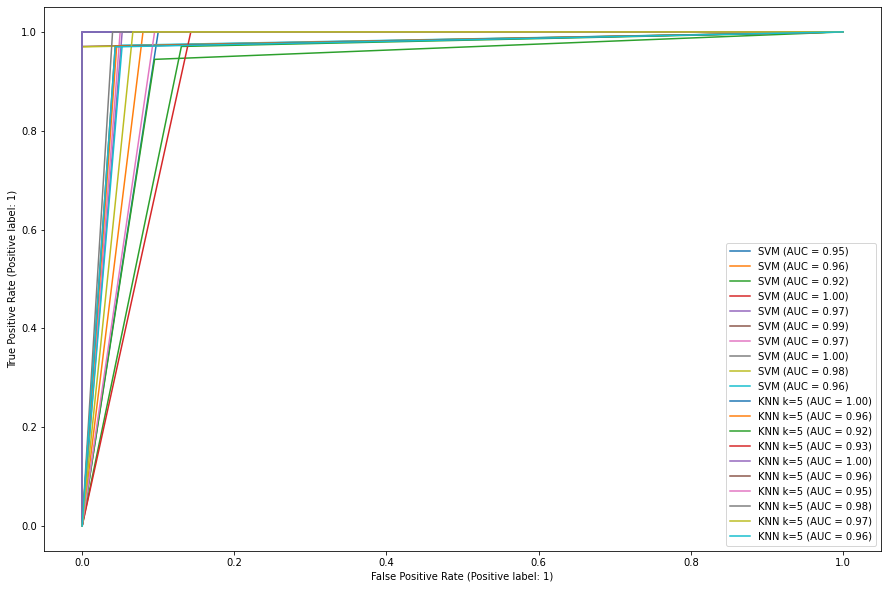

In [58]:
classificadores = {
  "SVM" : {"modelo": SVC(), "scores": []},  
  "KNN k=5" : {"modelo": KNeighborsClassifier(n_neighbors=5), "scores": []}
}

plt.rcParams['figure.figsize'] = [15, 10]
fig, ax = plt.subplots()

cv = KFold(n_splits=10, shuffle=True, random_state=np.random.seed(1234))
for classifier_name in classificadores:
    for train_index, test_index in cv.split(df):
        
        X_train, y_train = X.iloc[train_index], y.iloc[train_index]
        X_test, y_test = X.iloc[test_index], y.iloc[test_index]
        X_train, X_test, y_train, y_test=preprocess(X_train, X_test, y_train, y_test)
        
        classificadores[classifier_name]["modelo"].fit(X_train, np.ravel(y_train))
        prediction=classificadores[classifier_name]["modelo"].predict(X_test)
        
        fpr, tpr, _ = metrics.roc_curve(y_test, prediction)
        roc_auc = metrics.auc(fpr, tpr)
        
        classificadores[classifier_name]["scores"].append(roc_auc)
        ax.add_image=metrics.RocCurveDisplay.from_predictions(y_test, prediction, ax=ax, name=classifier_name)

In [59]:
import statistics as stats

In [60]:
for classifier_name in classificadores:
    
    mean=stats.mean(classificadores[classifier_name]["scores"])
    stdev=stats.stdev(classificadores[classifier_name]["scores"])
    
    print("The method {} have AUC(area under curve) results with the following statistics mean: {} stdev: {}".format(classifier_name, mean, stdev))

The method SVM have AUC(area under curve) results with the following statistics mean: 0.9713600684637836 stdev: 0.02340928124380054
The method KNN k=5 have AUC(area under curve) results with the following statistics mean: 0.963734712857475 stdev: 0.026195556614046656
